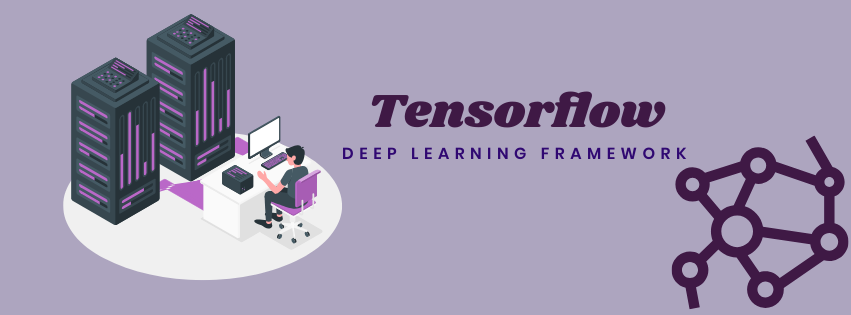


### 🎩  Tensorflow

TensorFlow is an open-source machine learning framework developed by Google for building and training deep learning models.

### 👪  Keras

Keras is an open-source high-level neural networks API written in Python that runs on top of TensorFlow, Theano, or other deep learning frameworks.

### 🌅 Implementation of Neural Network with Tensorflow

`Neural Network`: A computational model inspired by the human brain that learns to make predictions from data through layers of interconnected artificial neurons.

`weight` : In machine learning, a weight is a parameter that determines the strength of the connection between neurons in a neural network, affecting the importance of input features in making predictions.

`bias`: Think of bias as the "base value" in a machine learning model. It's like an initial guess that the model starts with before learning from data.


#### 🚜 Import Libraries

**`datasets:`** Provides access to standard datasets for machine learning.

**`layers:`** Contains pre-built neural network layer types.

**`models:`** Simplifies the construction and training of deep learning models.

In [11]:
#deeplearning framework
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
#mathmetical computation
import numpy as np
#visualization
import matplotlib.pyplot as plt



### 🐸 Data Loading and Splitting

##### 🔮 About Dataset and visualization

**CIFAR-10** is a well-known benchmark dataset in machine learning and computer vision. It consists of 60,000 color images, each 32x32 pixels in size, categorized into 10 different classes. These classes include common objects and animals. CIFAR-10 is often used for tasks like image classification and object recognition, making it a standard dataset for evaluating and testing machine learning and deep learning models.

In [5]:
#data loading
(train_images,train_labels) , (test_images, test_labels) = datasets.cifar10.load_data() 

In [6]:
print (f"Shape of train images {train_images.shape} and train label {train_labels.shape}")
print (f"Shape of test images {test_images.shape} and test label {test_labels.shape}")

Shape of train images (50000, 32, 32, 3) and train label (50000, 1)
Shape of test images (10000, 32, 32, 3) and test label (10000, 1)


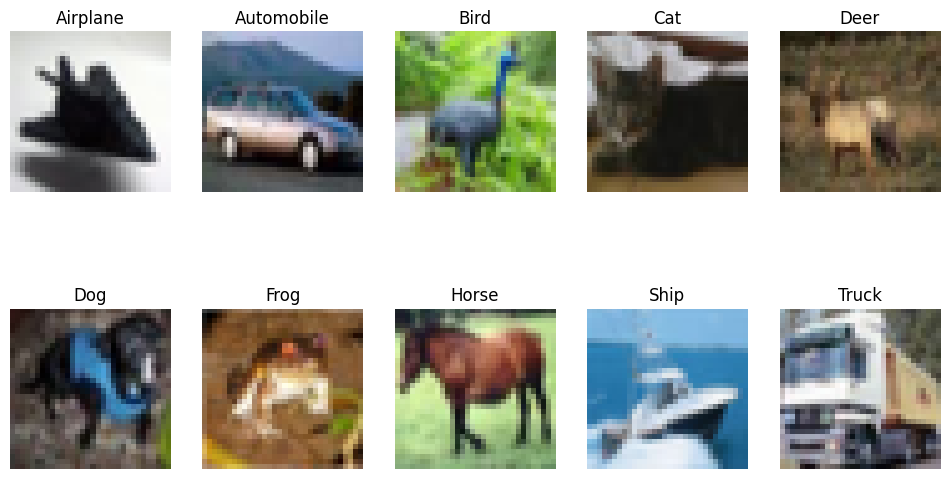

In [10]:
# Assuming you have the train_images and train_labels arrays
# You need to have these arrays loaded from the CIFAR-10 dataset or another source.

# CIFAR-10 class names for labels
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Create a figure with 2 rows and 5 columns to display 10 images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5)

# Loop through the class labels and display the first image for each class
for i in range(10):
    # Find the index of the first occurrence of the current label
    index = np.where(train_labels == i)[0][0]
    
    # Get the image and label
    image = train_images[index]
    label = class_names[i]
    
    # Set up the subplot
    ax = axes[i // 5, i % 5]
    ax.imshow(image)
    ax.set_title(label)
    ax.axis('off')

plt.show()


📌 **note:** This code shows ten pictures from the **CIFAR-10** dataset, each representing a different object, like a car or a cat. It arranges these pictures in a **2x5 grid**. To do this, the code goes through the dataset, finds the first picture for each type of object, and displays them in a nice grid with their names.

The line **`index = np.where(train_labels == i)[0][0]`** finds the index of the first image with label i in the train_labels array. It looks for where train_labels equals i, then takes the first occurrence's index. 

* np.where(...): Find where a condition is true.
* train_labels == i: Check if a label matches i.
* [0]: Select the first match.Ensures we get the indices of all such images as an array.
* [0]: Extract the index. It ensures that we only take the very first image with the specific label.


### 💫 Data Pre-Processing

In [4]:
#data preprocessing
train_images, test_images = train_images/255.0, test_images/255.0

📌 **note:**`train_images/255.0` and `test_images/255.0` are likely used to normalize pixel values in images by dividing them by **255.0**, **scaling** them to a range between **0 and 1**, which is a common preprocessing step in machine learning for **image data**.

### 🐸 Building Tensorflow Model for CNN

**Convolutional Neural Network (CNN)** is a deep learning architecture designed for processing and analyzing structured grid data, particularly images, by using convolutional layers to capture hierarchical patterns.

* **models.Sequential():** Linear stack of layers for building a neural network.
* **layers:** Neural network layer types.
* **Conv2D:** Convolutional layer for feature extraction.
* **MaxPooling2D:** Down-sampling layer for reducing spatial dimensions.
* **Flatten:** Layer for reshaping data.
* **Dense:** Fully connected layer for classification or regression.

**`layers.Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3))`**: This line specifies the properties of the convolutional layer.

* `32:` This is the number of filters (also known as kernels) in the layer, which means the layer will learn 32 different patterns or features.
* `(3,3):` This represents the size of each filter, which is 3x3 pixels.
* `activation="relu":` The Rectified Linear Unit (ReLU) activation function is applied to the output of this layer.
* `input_shape=(32, 32, 3):` This defines the shape of the input data expected by the model. It indicates that each input should be a 32x32 pixel image with 3 color channels (RGB).

**`layers.MaxPooling2D((2, 2)):`** This line specifies the properties of the max-pooling layer.
* `(2, 2):` This indicates the size of the pooling window. In this case, a 2x2 window is used.


**`layers.Flatten():`** It essentially "flattens" the data, making it suitable for feeding into a fully connected (dense) layer, which requires a 1D input.

**`layers.Dense(10):`**  10 classes, making it suitable for multi-class classification tasks. 

* **ReLU():** it's a non-linear activation function to introduce non-linearity in neural network. Therefore it can retrive more complex pattern from inputs.
* **optimizer = "adam"** sets the optimization algorithm to Adam. Adam is an adaptive learning rate optimization algorithm that is commonly used in training neural networks. It combines ideas from both the Adagrad and RMSprop algorithms and is known for its efficient convergence during training.
* **Categorical Cross-Entropy:** uses for one-hot encoding.
* **Sparse Categorical Cross-Entropy:** uses for label encoding.


Epoch 1/10
1563/1563 [==============================] - 45s 28ms/step - loss: 1.8253 - accuracy: 0.3553 - val_loss: 1.4930 - val_accuracy: 0.4549
Epoch 2/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.3708 - accuracy: 0.5088 - val_loss: 1.3075 - val_accuracy: 0.5330
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1845 - accuracy: 0.5827 - val_loss: 1.2396 - val_accuracy: 0.5728
Epoch 4/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0715 - accuracy: 0.6222 - val_loss: 1.0907 - val_accuracy: 0.6167
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9916 - accuracy: 0.6525 - val_loss: 1.1122 - val_accuracy: 0.6196
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9224 - accuracy: 0.6773 - val_loss: 1.0912 - val_accuracy: 0.6342
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8528 - accuracy: 0.7016 - val_loss: 1.0796 -

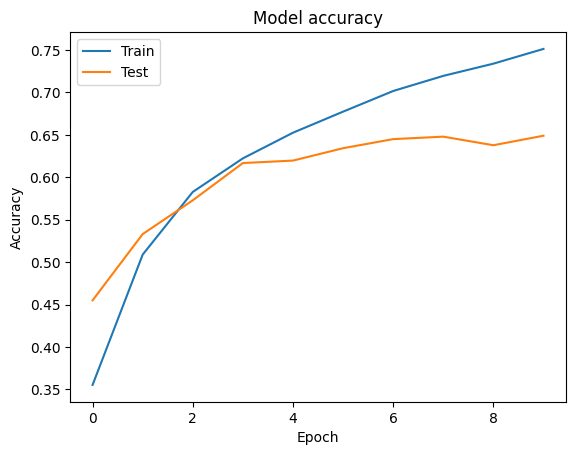

In [13]:
model = models.Sequential()

#input layer
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (32,32,3)))
#pooling layer
model.add(layers.MaxPooling2D((2,2)))
#hidden layer
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#1D transform
model.add(layers.Flatten())
#Feed Forward Layer
model.add(layers.Dense(64, activation='relu'))
#10 classes
model.add(layers.Dense(10))

#Compile the model
model.compile(optimizer = "adam",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])
#Train model
history = model.fit(train_images, train_labels, epochs = 10, 
                   validation_data = (test_images, test_labels))

#Evaluate Model
test_accuracy, test_loss = model.evaluate(test_images, test_labels, verbose = 2)
print('\n Test Accuracy: ', test_accuracy)
print('\n Test Loss: ', test_loss)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

📌 **note:** This code defines, trains, and evaluates a Convolutional Neural Network (CNN) for image classification:

* **Model Definition:** The model consists of convolutional layers for feature extraction, followed by dense layers for classification. Input images are processed through convolution and pooling layers.

* **Model Compilation:** The model is configured with the Adam optimizer and Sparse Categorical Cross-Entropy loss for multi-class classification.

* **Model Training:** It's trained on training data (train_images and train_labels) for 10 epochs, with validation on test data (test_images and test_labels).

* **Model Evaluation:** After training, the model's accuracy and loss are evaluated on the test data. Training and validation accuracy are plotted over epochs.

